## Импорт библиотек

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from scipy.stats.stats import pearsonr
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['citric acid'].value_counts()

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
1.00      1
0.72      1
0.71      1
0.78      1
0.79      1
Name: citric acid, Length: 80, dtype: int64

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
# Преобразуем целевую переменную как:
# 'bad wine' (0): quality < 6.5 и 'good wine' (1): quality > 6.5
df['quality'] = df['quality'].apply(lambda x: 0 if x < 6.5 else 1)

In [9]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Анализ распределений признаков

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


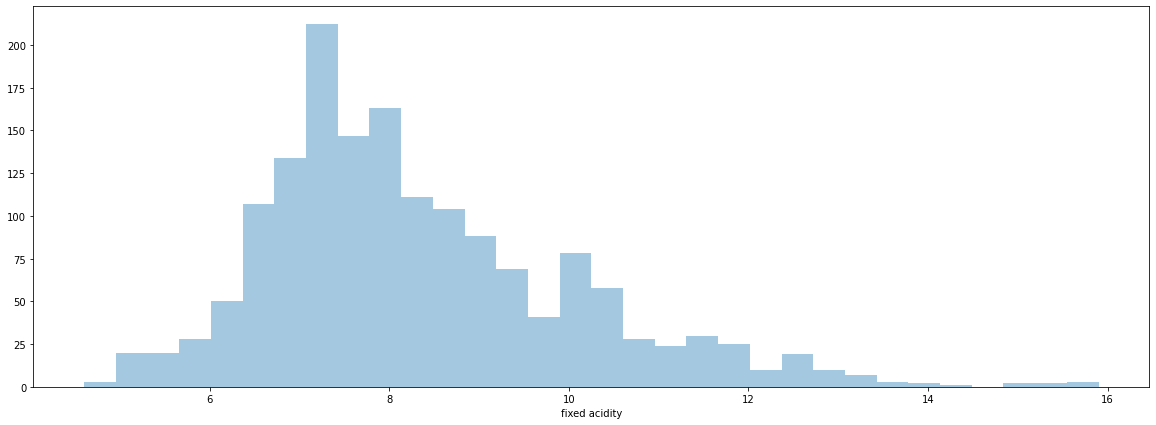

In [10]:
# Гистограмма распределения fixed acidity - распределение близко к нормальному
plt.rcParams["figure.figsize"] = (20, 7)
sns.distplot(df["fixed acidity"], kde=False)
plt.show()

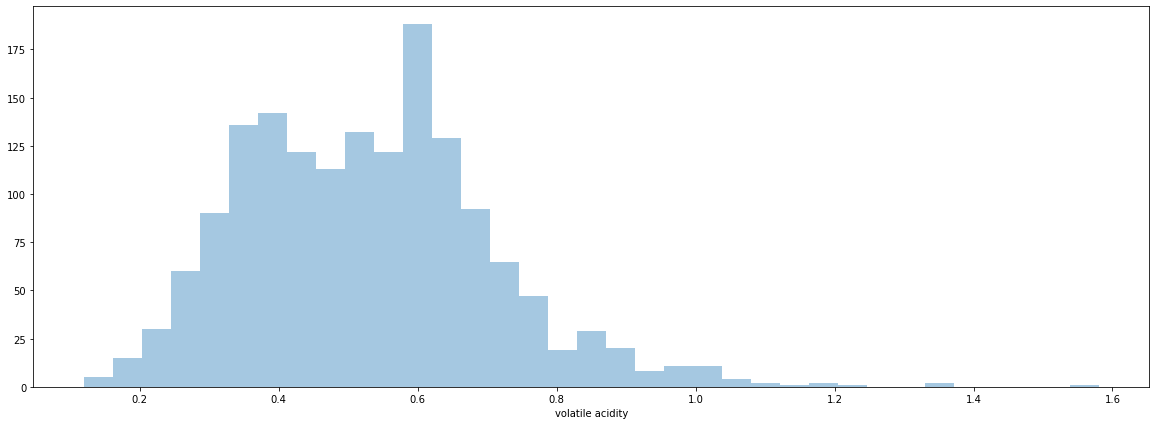

In [11]:
# Гистограмма распределения volatile acidity - распределение близко к нормальному
sns.distplot(df["volatile acidity"], kde=False)
plt.show()

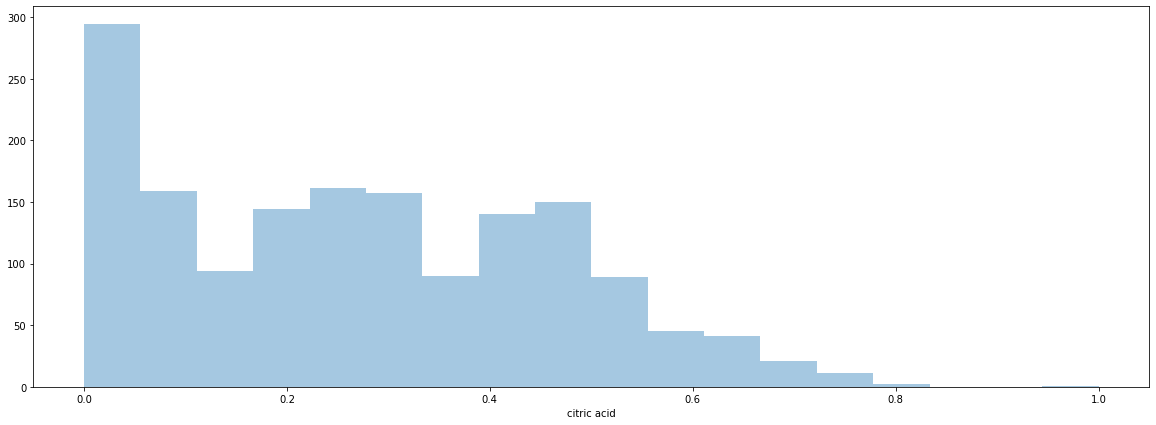

In [12]:
# Гистограмма распределения citric acid - экспоненциальное распределение
sns.distplot(df["citric acid"], kde=False)
plt.show()

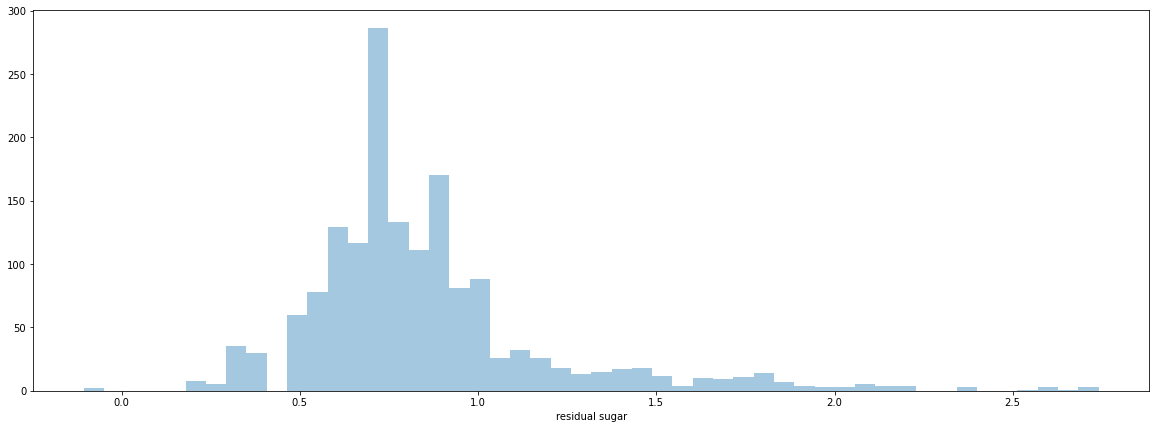

In [13]:
# Гистограмма распределения residual sugar - логнормальное распределение
sns.distplot(np.log(df["residual sugar"]), kde=False)
plt.show()

In [14]:
# Приведем логнормальное распределение residual sugar к нормальному
df["residual sugar"] = np.log(df["residual sugar"])

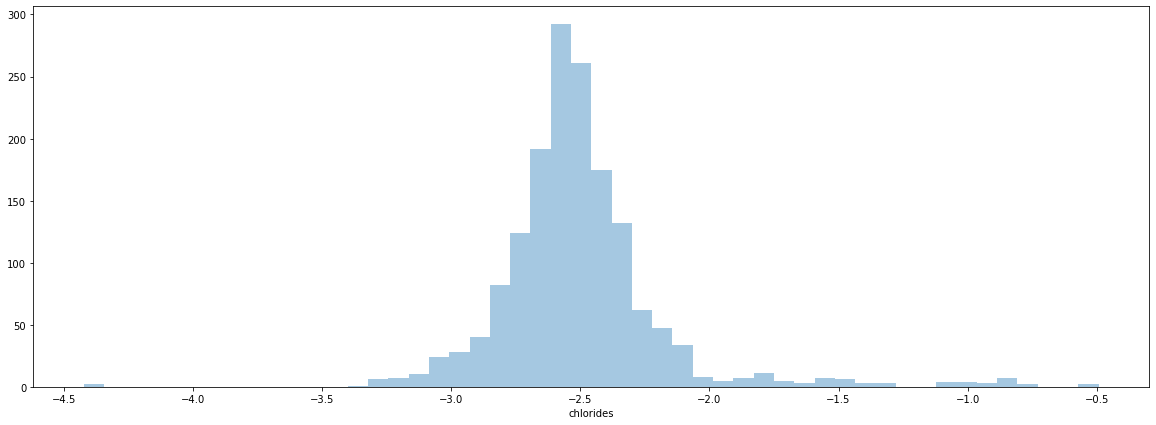

In [15]:
# Гистограмма распределения chlorides - логнормальное распределение
sns.distplot(np.log(df["chlorides"]), kde=False)
plt.show()

In [16]:
# Приведем логнормальное распределение chlorides к нормальному
df["chlorides"] = np.log(df["chlorides"])

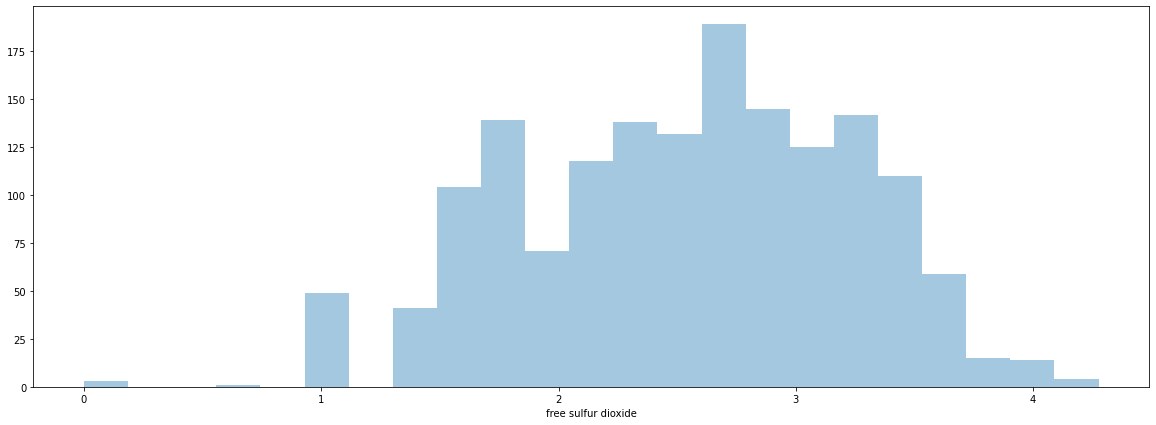

In [17]:
# Гистограмма распределения free sulfur dioxide - логнормальное распределение
sns.distplot(np.log(df["free sulfur dioxide"]), kde=False)
plt.show()

In [18]:
# Приведем логнормальное распределение free sulfur dioxide к нормальному
df["free sulfur dioxide"] = np.log(df["free sulfur dioxide"])

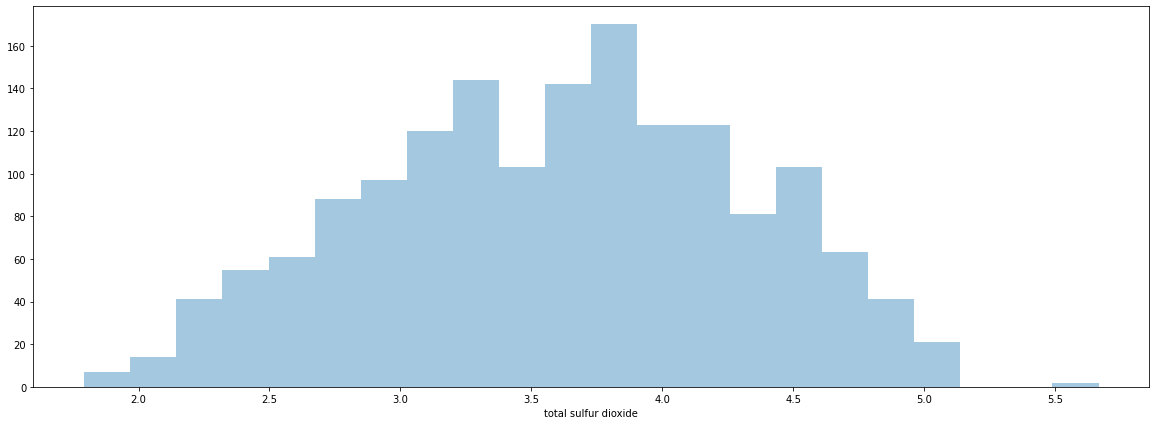

In [19]:
# Гистограмма распределения total sulfur dioxide - логнормальное распределение
sns.distplot(np.log(df["total sulfur dioxide"]), kde=False)
plt.show()

In [20]:
# Приведем логнормальное распределение total sulfur dioxide к нормальному
df["total sulfur dioxide"] = np.log(df["total sulfur dioxide"])

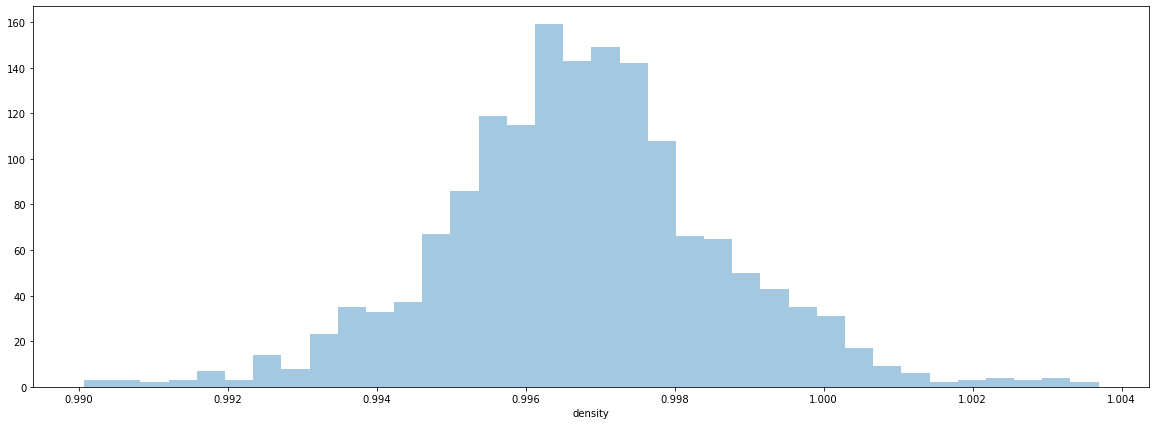

In [21]:
# Гистограмма распределения density - нормальное распределение
sns.distplot(df["density"], kde=False)
plt.show()

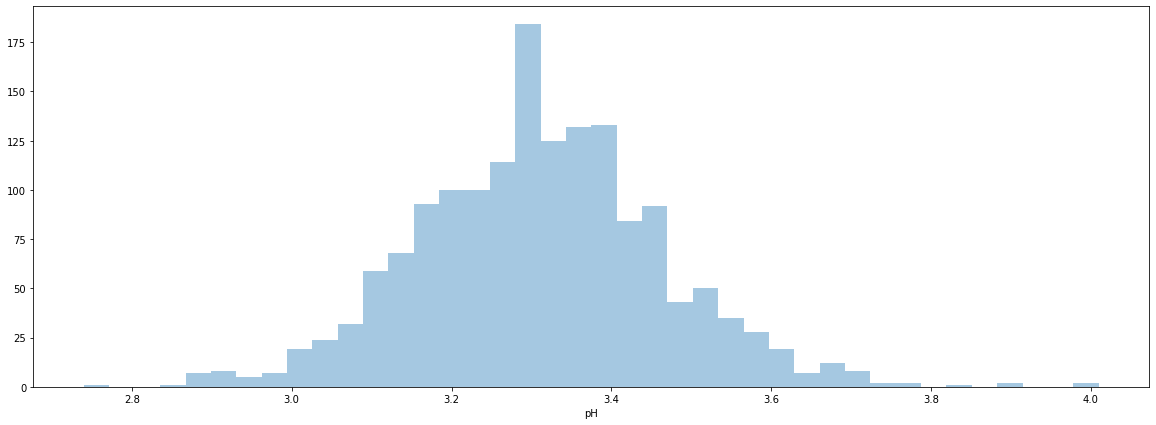

In [22]:
# Гистограмма распределения pH - нормальное распределение
sns.distplot(df["pH"], kde=False)
plt.show()

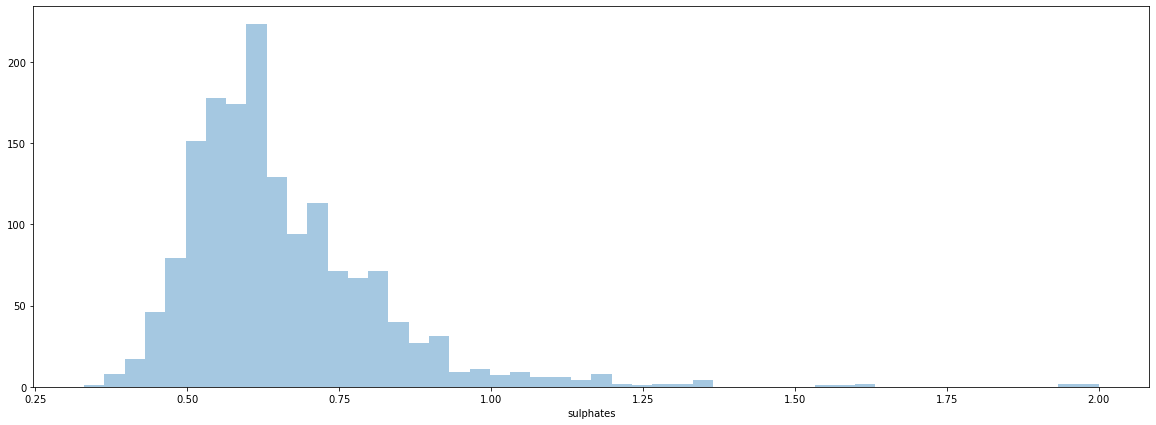

In [23]:
# Гистограмма распределения sulphates - нормальное распределение cо сдвигом
sns.distplot(df["sulphates"], kde=False)
plt.show()

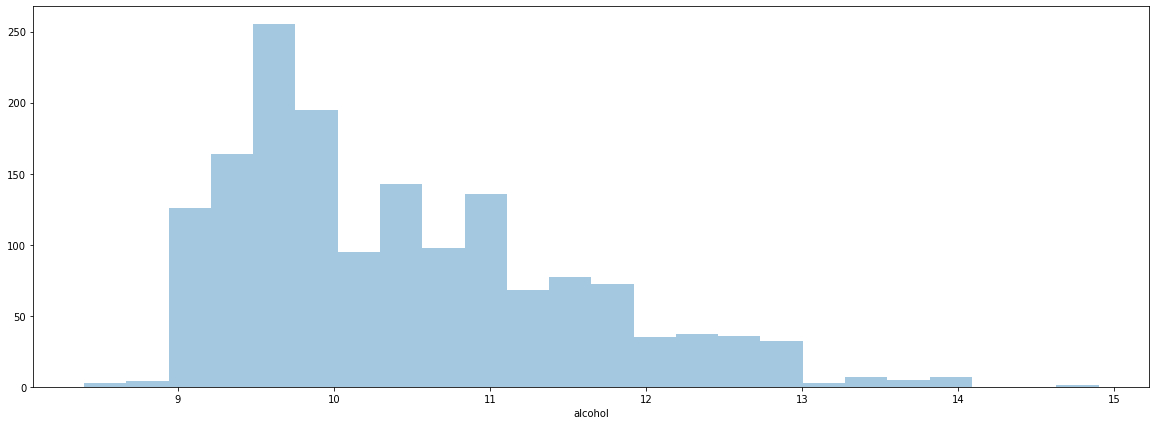

In [24]:
# Гистограмма распределения alcohol - нормальное распределение cо сдвигом
sns.distplot(df["alcohol"], kde=False)
plt.show()

## Корреляция признаков относительно целевой переменной

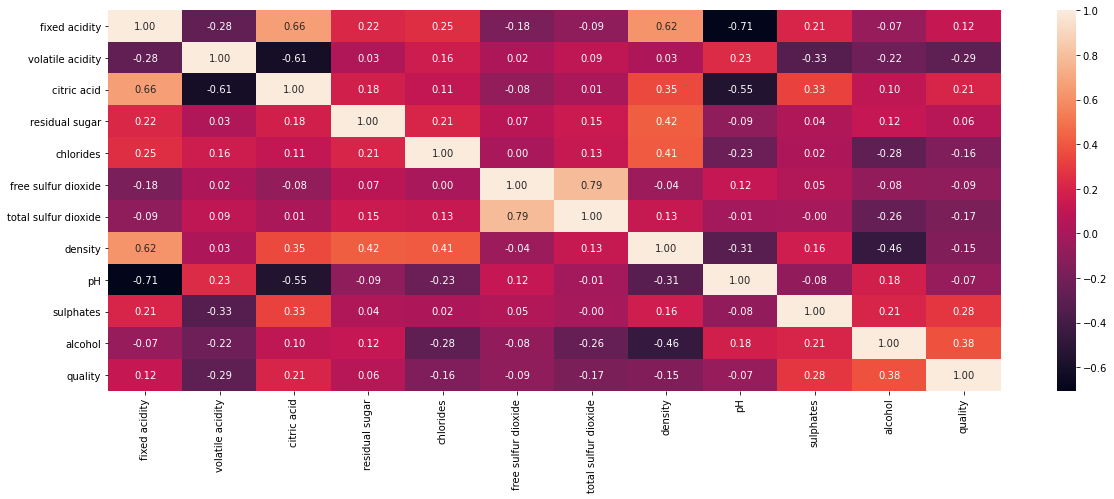

In [25]:
# Диаграмма корреляций
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
corr = df[cols].corr(method="spearman")

sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [26]:
# признаки, сортированные по наибольшей скоррелированности с quality
np.abs(corr["quality"].drop("quality")).sort_values(ascending=False)

alcohol                 0.382923
volatile acidity        0.290816
sulphates               0.283449
citric acid             0.211528
total sulfur dioxide    0.171952
chlorides               0.156945
density                 0.151152
fixed acidity           0.124548
free sulfur dioxide     0.089065
pH                      0.066554
residual sugar          0.060337
Name: quality, dtype: float64

Достаточно сильной корреляции между quality и другими признаками нет (максимальная корреляция - 0.38). Высокая корреляция между total sulfur dioxide и free sulfur dioxide (0.79) , pH и fixed acidity (0.71)

Преобразование признаков с помощью StandardScaler():

In [27]:
scale = StandardScaler()
df[['fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
  ] = scale.fit_transform(df[[
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']])
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.435512e-16,1.699704e-16,4.335355e-16,2.999477e-17,1.197083e-15,3.011280e-16,-2.067001e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16,0.135710
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.342587
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-2.674245e+00,-5.861545e+00,-3.716562e+00,-2.565276e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,0.000000
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-5.831499e-01,-4.701690e-01,-8.761376e-01,-7.227721e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,0.000000
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-1.728770e-01,-1.004110e-01,1.356421e-01,5.227757e-02,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,0.000000
75%,5.057952e-01,6.266881e-01,7.652471e-01,2.946274e-01,2.981114e-01,7.274952e-01,7.465024e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,0.000000
max,4.355149e+00,5.877976e+00,3.743574e+00,5.290907e+00,6.153238e+00,2.526042e+00,2.929362e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,1.000000


## Построение модели и подбор гиперпараметров

In [28]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [29]:
# Если не указывать в SVC ничего в параметрах - берет rbf
clf = SVC(random_state=42)

In [30]:
# cross-validator
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

In [31]:
search_space = {
                'C' : np.linspace(5, 6, 2),
                'gamma' :  np.linspace(5, 6, 2),
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
                }

In [32]:
search_space

{'C': array([5., 6.]),
 'gamma': array([5., 6.]),
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [33]:
# # Строим сетку GridSearch с заданными параметрами
# gs = GridSearchCV(clf, param_grid = search_space, cv = cv)

# # Обучаем модель GridSearch
# model_grid = gs.fit(X, y)

# # Лучшие результаты GridSearch
# print(model_grid.best_score_)
# print(model_grid.best_params_)

In [34]:
# Строим сетку RandomizedSearch с заданными параметрами
random_search = RandomizedSearchCV(clf,
                                   search_space, 
                                   cv = cv, 
                                   return_train_score = True, 
                                   n_iter = 10,
                                   scoring = 'accuracy'
                                  )

# Обучаем модель RandomizedSearch
model_rand = random_search.fit(X, y)

# Лучшие результаты RandomizedSearch
print(model_rand.best_score_)
print(model_rand.best_params_)

0.9052083333333334
{'kernel': 'rbf', 'gamma': 5.0, 'C': 6.0}


In [37]:
# Строим модель
clf = SVC(kernel = 'rbf', gamma = 5, C = 6, random_state = 42)

In [41]:
# Смотрим на точность предсказаний модели
cvs = cross_val_score(clf, X, y, cv = cv, scoring = 'accuracy')
print(cvs)
print(cvs.mean())

[0.90625  0.90625  0.903125]
0.9052083333333334
